In [1]:
"""
Lab 8: Implementation of Deutsch's Algorithm
Simple and concise implementation
"""

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

print("="*60)
print("DEUTSCH'S ALGORITHM - 2 QUBIT CASE")
print("="*60)


DEUTSCH'S ALGORITHM - 2 QUBIT CASE


In [2]:

# =============================================================================
# STEP 1: Define the 4 Possible Query Gates (Oracles)
# =============================================================================

def deutsch_function(case):
    """
    Create oracle for one of 4 possible functions:
    case 0: f(x) = 0 (constant)
    case 1: f(x) = 1 (constant)
    case 2: f(x) = x (balanced)
    case 3: f(x) = NOT x (balanced)
    """
    oracle = QuantumCircuit(2, name=f'Oracle_{case}')
    
    if case == 0:
        # f(x) = 0: Do nothing
        pass
    elif case == 1:
        # f(x) = 1: Flip output
        oracle.x(1)
    elif case == 2:
        # f(x) = x: CNOT
        oracle.cx(0, 1)
    elif case == 3:
        # f(x) = NOT x: X then CNOT
        oracle.x(0)
        oracle.cx(0, 1)
        oracle.x(0)
    
    return oracle



In [3]:
# =============================================================================
# STEP 2: Create Complete Deutsch Circuit
# =============================================================================

def deutsch_algorithm(oracle):
    """Build complete Deutsch's algorithm circuit"""
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qr, cr)
    
    # Initialize: |0⟩|1⟩
    circuit.x(1)
    circuit.barrier()
    
    # Apply Hadamard to both qubits
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    
    # Apply oracle
    circuit.compose(oracle, inplace=True)
    circuit.barrier()
    
    # Apply Hadamard to input qubit
    circuit.h(0)
    circuit.barrier()
    
    # Measure input qubit
    circuit.measure(0, 0)
    
    return circuit



In [4]:
# =============================================================================
# STEP 3: Run and Determine Result
# =============================================================================

def run_deutsch(case):
    """
    Run Deutsch's algorithm and return result
    Returns: 'constant' or 'balanced'
    """
    # Create oracle
    oracle = deutsch_function(case)
    
    # Build circuit
    circuit = deutsch_algorithm(oracle)
    
    # Run simulation
    simulator = AerSimulator()
    compiled = transpile(circuit, simulator)
    job = simulator.run(compiled, shots=1)
    result = job.result()
    counts = result.get_counts()
    
    # Determine result
    measured = list(counts.keys())[0]
    if measured == '0':
        return 'constant', circuit, counts
    else:
        return 'balanced', circuit, counts




TESTING ALL 4 DEUTSCH FUNCTIONS

Case 0: f(x) = 0 (constant)
  Result: constant ✓
  Measurement: 0

Case 1: f(x) = 1 (constant)
  Result: constant ✓
  Measurement: 0

Case 2: f(x) = x (balanced)
  Result: balanced ✓
  Measurement: 1

Case 3: f(x) = NOT x (balanced)
  Result: balanced ✓
  Measurement: 1

💾 Circuits saved as 'deutsch_all_cases.png'


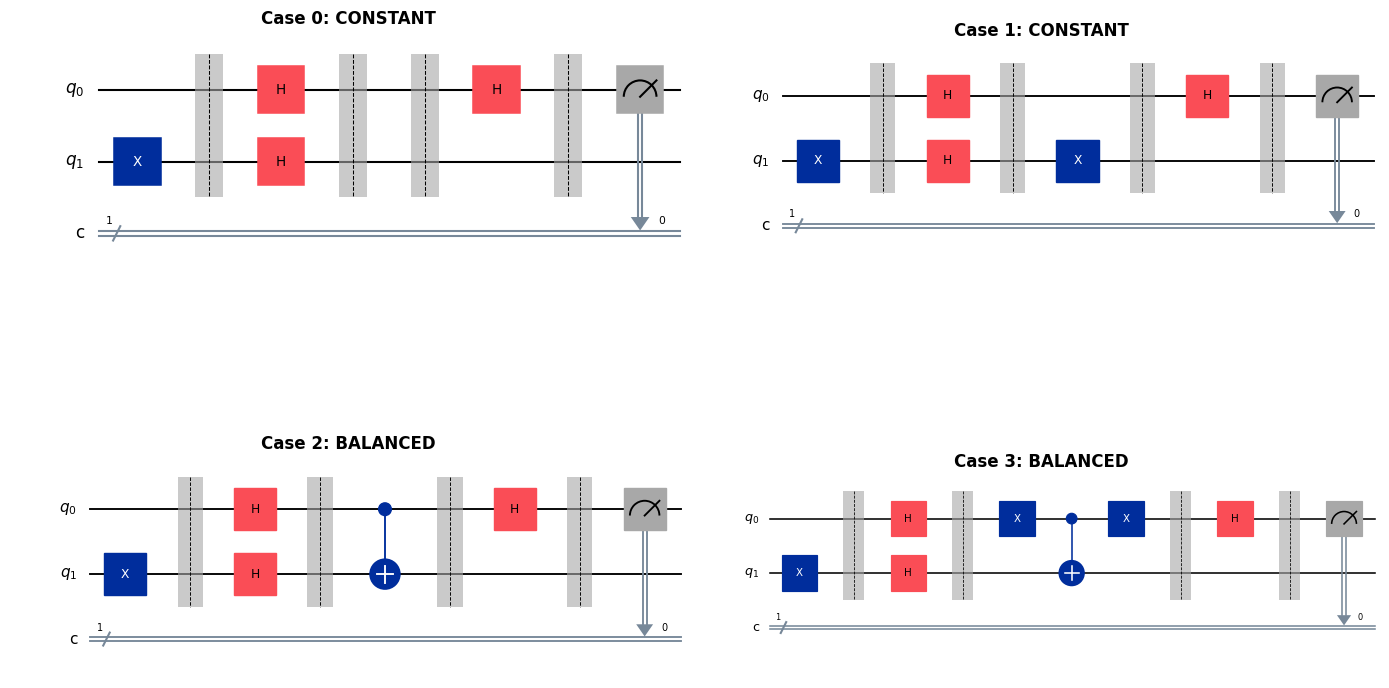

In [5]:
# =============================================================================
# STEP 4: Test All 4 Cases
# =============================================================================

print("\n" + "="*60)
print("TESTING ALL 4 DEUTSCH FUNCTIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for case in range(4):
    result, circuit, counts = run_deutsch(case)
    
    # Determine actual type
    actual = 'constant' if case < 2 else 'balanced'
    
    # Print result
    print(f"\nCase {case}: f(x) = ", end="")
    if case == 0:
        print("0 (constant)")
    elif case == 1:
        print("1 (constant)")
    elif case == 2:
        print("x (balanced)")
    else:
        print("NOT x (balanced)")
    
    print(f"  Result: {result} ✓" if result == actual else f"  Result: {result} ✗")
    print(f"  Measurement: {list(counts.keys())[0]}")
    
    # Draw circuit
    circuit.draw('mpl', ax=axes[case], style='iqp')
    axes[case].set_title(f'Case {case}: {result.upper()}', 
                         fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('deutsch_all_cases.png', dpi=300, bbox_inches='tight')
print("\n💾 Circuits saved as 'deutsch_all_cases.png'")
plt.show()




DETAILED VIEW: RANDOM FUNCTION

🎲 Selected Case: 0

💾 Detailed view saved as 'deutsch_detailed.png'


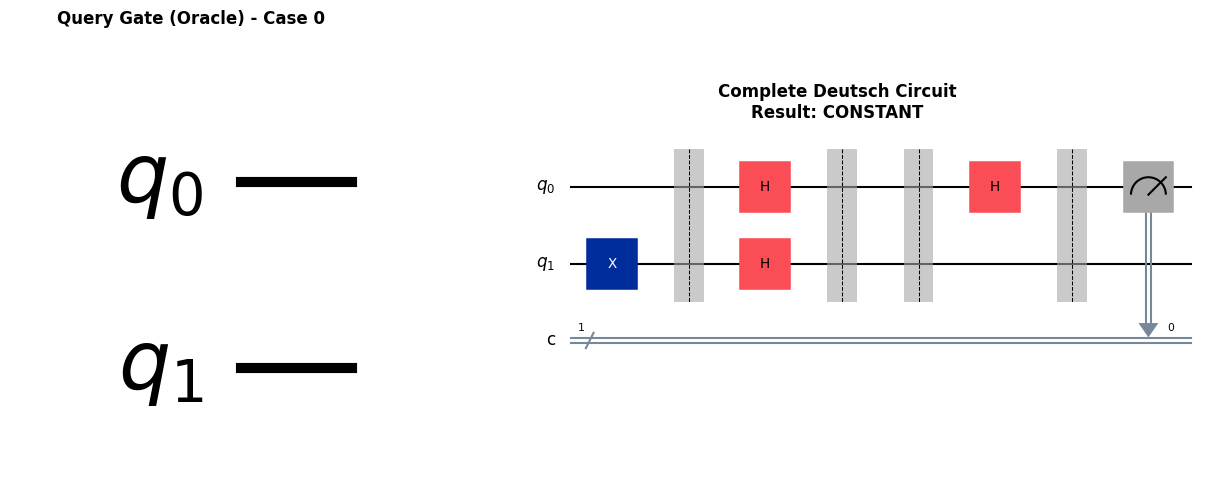


SUMMARY
Function type: constant
Measured state: 0
Classical queries needed: 2
Quantum queries needed: 1
Speedup: 2x


In [6]:
# =============================================================================
# STEP 5: Detailed View of One Random Case
# =============================================================================

print("\n" + "="*60)
print("DETAILED VIEW: RANDOM FUNCTION")
print("="*60)

# Pick random case
random_case = np.random.randint(0, 4)
print(f"\n🎲 Selected Case: {random_case}")

# Get oracle and result
oracle = deutsch_function(random_case)
result, circuit, counts = run_deutsch(random_case)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Oracle circuit
oracle.draw('mpl', ax=axes[0], style='iqp')
axes[0].set_title(f'Query Gate (Oracle) - Case {random_case}', 
                  fontsize=12, fontweight='bold')

# Complete circuit
circuit.draw('mpl', ax=axes[1], style='iqp')
axes[1].set_title(f"Complete Deutsch Circuit\nResult: {result.upper()}", 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('deutsch_detailed.png', dpi=300, bbox_inches='tight')
print(f"\n💾 Detailed view saved as 'deutsch_detailed.png'")
plt.show()

# Summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Function type: {result}")
print(f"Measured state: {list(counts.keys())[0]}")
print(f"Classical queries needed: 2")
print(f"Quantum queries needed: 1")
print(f"Speedup: 2x")
print("="*60)